# Understand the Data

[[Kaggle Dateset](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores)]

## Import libraries

In [32]:
# type: ignore
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Input Data

In [33]:
df = pd.read_csv("./Expanded_data_with_more_features.csv", encoding= 'unicode_escape')
df.head(2)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


In [34]:
df.shape

(30641, 15)

In [35]:
df.size

459615

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [37]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,30641.0,NaN,NaN,NaN,499.556607,288.747894,0.0,249.0,500.0,750.0,999.0
Gender,30641,2,female,15424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EthnicGroup,28801,5,group C,9212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParentEduc,28796,6,some college,6633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LunchType,30641,2,standard,19905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TestPrep,28811,2,none,18856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParentMaritalStatus,29451,4,married,16844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PracticeSport,30010,3,sometimes,15213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsFirstChild,29737,2,yes,19082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NrSiblings,29069.0,NaN,NaN,NaN,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0


In [38]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

`Data Dictionary`

| Column Name          | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| **Gender**            | Gender of the student (male/female)                                         |
| **EthnicGroup**       | Ethnic group of the student (neither Christian nor Jewish)                                  |
| **ParentEduc**        | Parent(s) education background (from some_highschool to master's degree)    |
| **LunchType**         | School lunch type (standard or free/reduced)                                |
| **TestPrep**          | Test preparation course followed (completed or none)                        |
| **ParentMaritalStatus** | Parent(s) marital status (married/single/widowed/divorced)                 |
| **PracticeSport**     | How often the student practices sport (never/sometimes/regularly)           |
| **IsFirstChild**      | If the child is the first in the family (yes/no)                            |
| **NrSiblings**        | Number of siblings the student has (0 to 7)                                 |
| **TransportMeans**    | Means of transport to school (schoolbus/private)                            |
| **WklyStudyHours**    | Weekly self-study hours (less than 5 hrs; between 5 and 10 hrs; more than 10 hrs) |
| **MathScore**         | Math test score (0-100)                                                     |
| **ReadingScore**      | Reading test score (0-100)                                                  |
| **WritingScore**      | Writing test score (0-100)                                                  |


# Data Cleaning

In [39]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [40]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [41]:
df.fillna({
    'EthnicGroup': 'Unknown',
    'ParentEduc': 'No Edu info',
    'ParentMaritalStatus': 'No info',
    
}, inplace=True)

In [42]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [43]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,Unknown,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [45]:
df[df['WklyStudyHours']=='05-Oct']

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


## Add new Col

In [46]:
# percentage col 
df['Percentage']= ( (df['WritingScore'] + df['MathScore'] + df['ReadingScore'])/300 ) * 100
df['Percentage'] = df['Percentage'].apply(lambda x: '{:,.2f}'.format(x))
df['Percentage'] = df['Percentage'].astype('float16')

In [47]:
# grade col
def grade(score):
   
    if score >= 80.0:
        return 'A'
    elif score >= 60.0:
        return 'B'
    elif score >= 40.0:
        return 'C'
    elif score >= 30.0:
        return 'D'
    else:
        return 'F'


In [48]:
df['Grade'] = df['Percentage'].apply(grade)

In [49]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Percentage,Grade
0,female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.00000,B
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.31250,A
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.31250,A
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,47.65625,C
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.31250,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,61.65625,B
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,54.00000,C
30638,female,Unknown,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,66.00000,B
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,88.31250,A


In [50]:
# for future reference

def all_mean_score_set():
    return {'MathScore':'mean', 'ReadingScore': 'mean','WritingScore':'mean'}

# EDA

## Gender

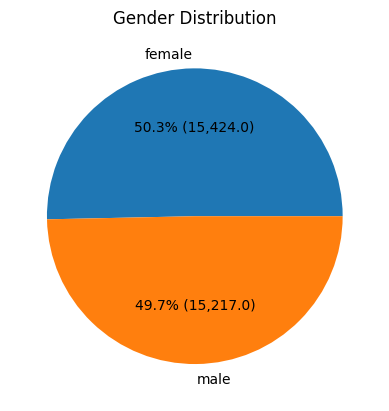

In [51]:
gender_count = df['Gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct=lambda p : '{:.1f}% ({:,.1f})'.format(p,p * sum(gender_count)/100))
plt.title('Gender Distribution')
plt.show()

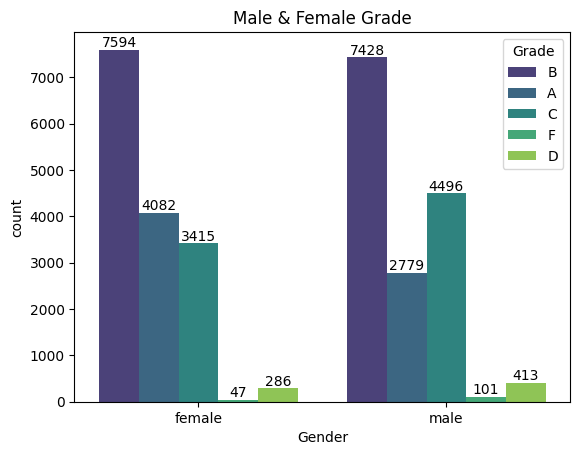

In [52]:
ax = sns.countplot(data=df, x='Gender', hue='Grade', palette='viridis')

for container in ax.containers:
    plt.bar_label(container)

plt.title('Male & Female Grade')   
plt.show()

<div class="alert alert-block alert-info">
<b>Info : </b> Both males and females have nearly equal participation.
</div>

## Parent Education vs Score

In [53]:
par_edu = df.groupby(['ParentEduc', ]).agg({'MathScore':'mean', 
                                      'ReadingScore': 'mean',
                                      'WritingScore':'mean'})

par_edu

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
No Edu info,66.645528,69.225474,68.295935
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


In [94]:
df.groupby(['ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean) \
    .style.background_gradient(cmap='RdPu')

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
No Edu info,66.645528,69.225474,68.295935
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


In [55]:
# Does parental education have an affect on different genders?
df.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
                                    .style.background_gradient(cmap='RdPu')

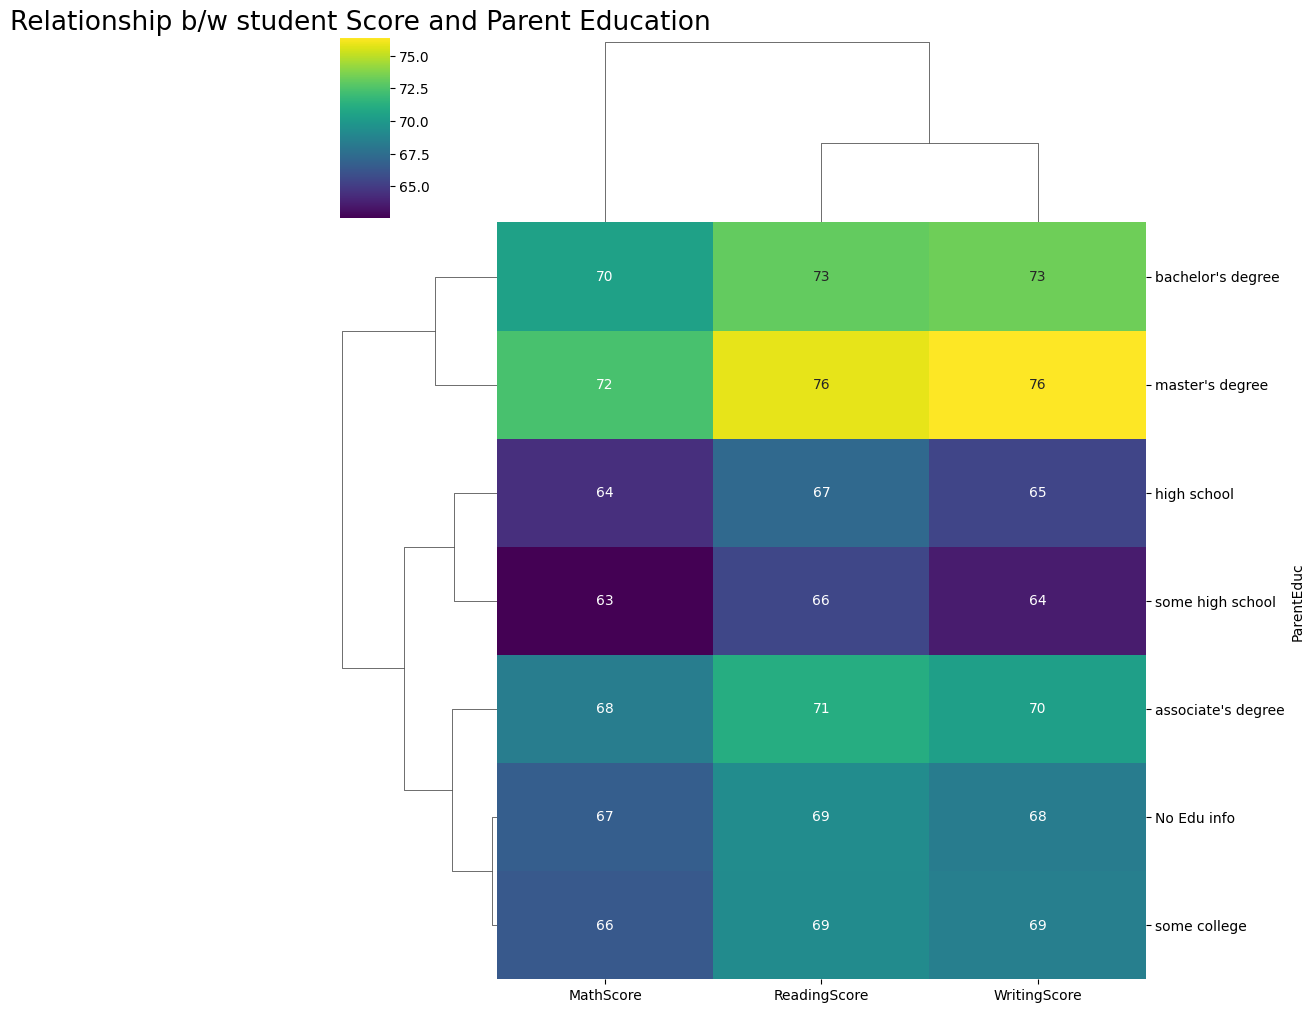

In [56]:
sns.clustermap(data=par_edu, cmap='viridis', annot=True) 
plt.title('Relationship b/w student Score and Parent Education ', size=19)
plt.show()

<div class="alert alert-block alert-info">
<b>Info : </b>Children of parents who have a master's degree are more likely to have better scores.
</div>

## Parent Marital Status vs Score

In [95]:
par_mar = df.groupby(['ParentMaritalStatus', ]).agg({'MathScore':'mean', 
                                      'ReadingScore': 'mean',
                                      'WritingScore':'mean'})

par_mar.style.background_gradient(cmap='RdPu')

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
No info,66.548739,69.237815,68.196639
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


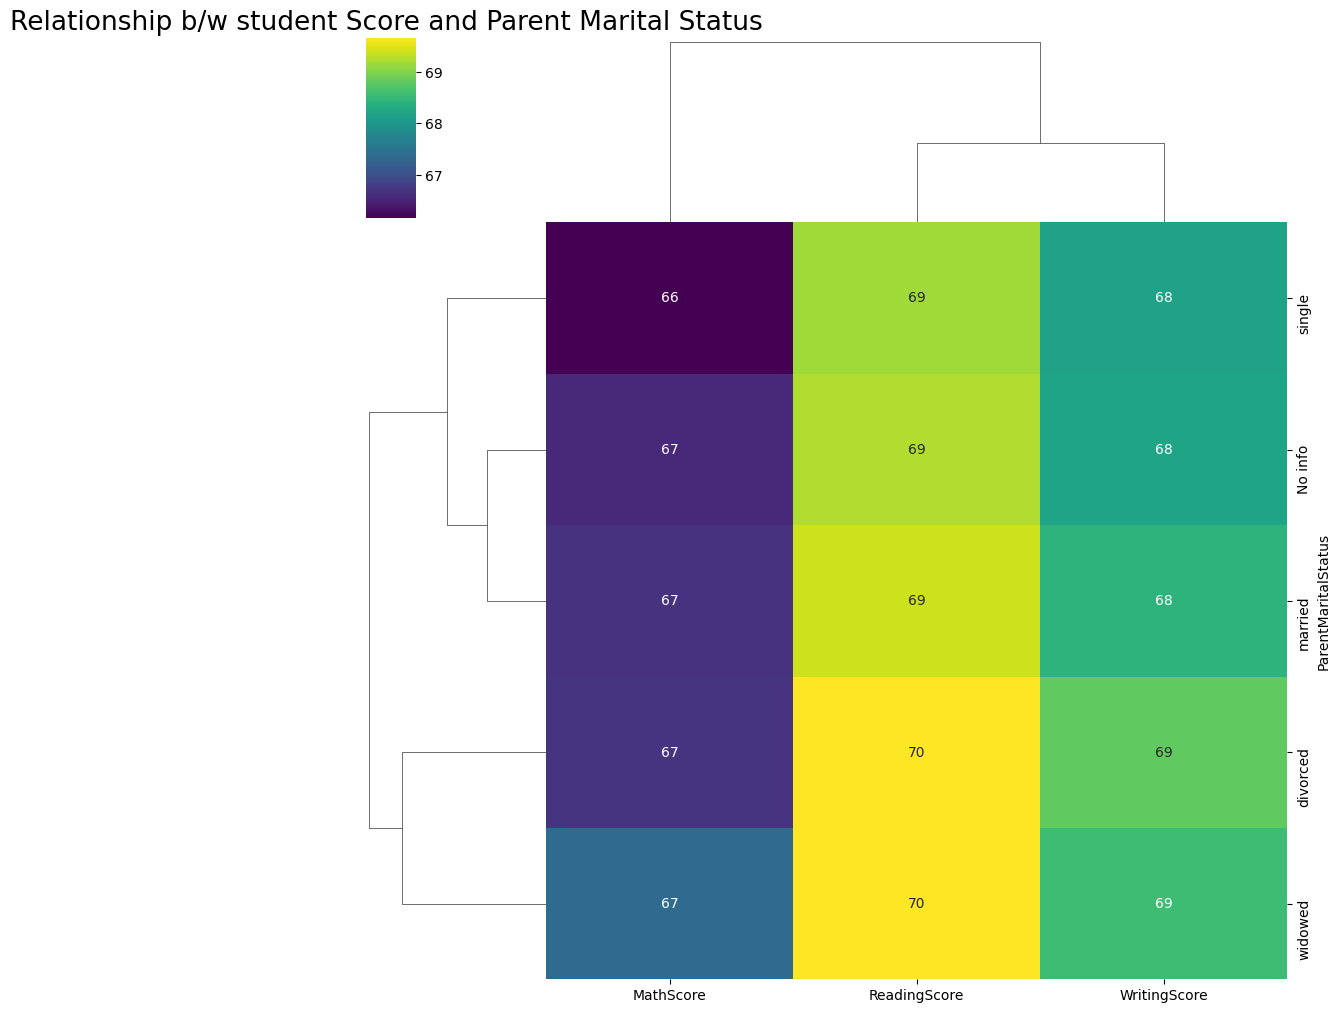

In [58]:
sns.clustermap(data=par_mar, cmap='viridis', annot=True)
plt.title('Relationship b/w student Score and Parent Marital Status ', size=19)
plt.show()

<div class="alert alert-block alert-info">
<b>Info : </b>There is no significant difference in children's scores due to their parents' marital status.
</div>

## All Scores

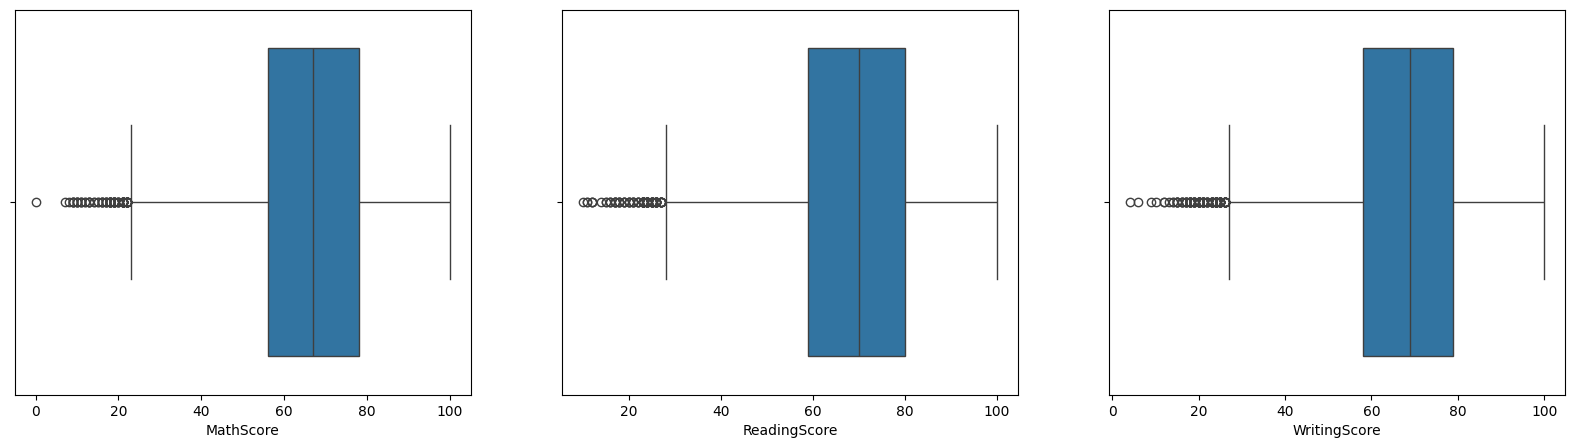

In [59]:
# df[df["ReadingScore"] < 10].count()
fig = plt.figure(figsize=(20, 5))

for index, one in enumerate(["MathScore", "ReadingScore", "WritingScore"]):
    fig.add_subplot(1, 3, index + 1)
    sns.boxplot(x=df[one])

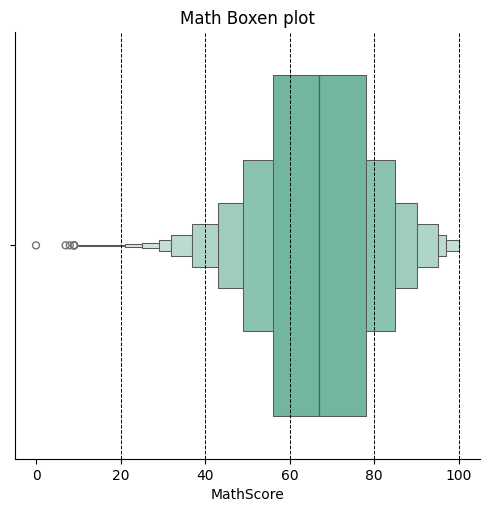

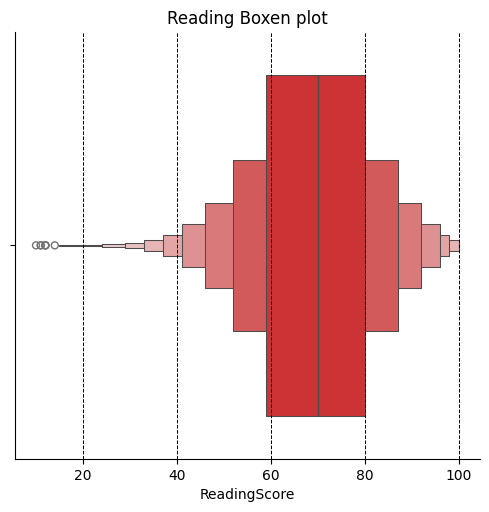

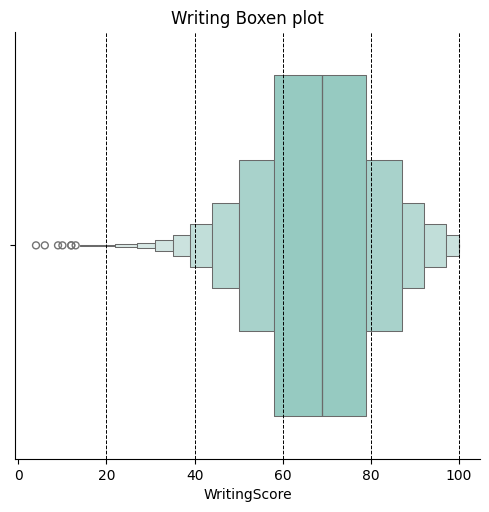

In [60]:
#math
sns.catplot(data=df, kind='boxen', x='MathScore', palette='Set2')
plt.title('Math Boxen plot')
for x in [20, 40, 60, 80, 100]:
    plt.axvline(x=x, color='black', linestyle='--', linewidth=0.7)
    
#reading
sns.catplot(data=df, kind='boxen', x='ReadingScore', palette='Set1')
plt.title('Reading Boxen plot')
for x in [20, 40, 60, 80, 100]:
    plt.axvline(x=x, color='black', linestyle='--', linewidth=0.7)
    
    
#writing
sns.catplot(data=df, kind='boxen', x='WritingScore', palette='Set3')
plt.title('Writing Boxen plot')
for x in [20, 40, 60, 80, 100]:
    plt.axvline(x=x, color='black', linestyle='--', linewidth=0.7)


plt.show()

## Ethnic group vs Score

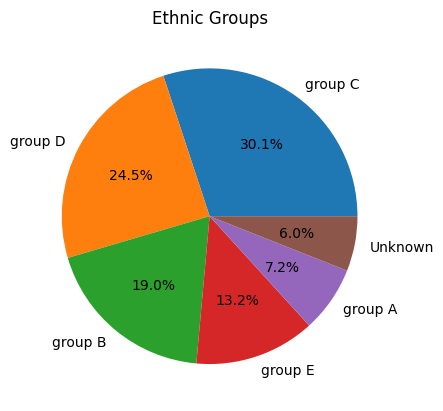

In [61]:
group_counts = df['EthnicGroup'].value_counts()
labels = group_counts.index

plt.pie(group_counts, labels=labels, autopct='%1.1f%%')
plt.title('Ethnic Groups')
plt.show()

In [62]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'Percentage', 'Grade'],
      dtype='object')

## Sport vs Score

In [96]:
sport = df.groupby(['PracticeSport']).agg({'MathScore':'mean', 
                                      'ReadingScore': 'mean',
                                      'WritingScore':'mean'})

sport.style.background_gradient(cmap='RdPu')

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


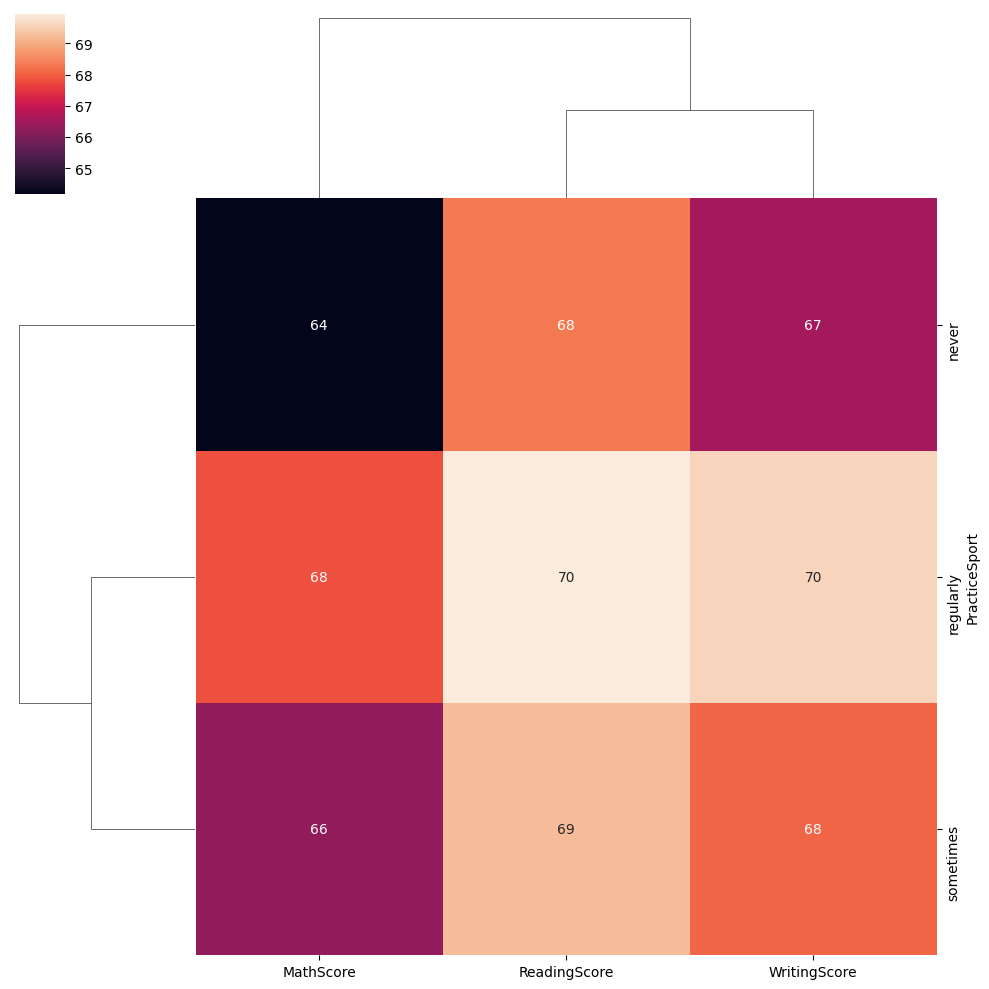

In [64]:
sns.clustermap(data=sport, annot=True)
plt.show()

## Test Practice vs Score

In [98]:
df.groupby(['PracticeSport']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


In [97]:
df.groupby(['PracticeSport', 'TestPrep']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

## Lunch vs Score

In [99]:
df.groupby(['LunchType', 'Gender']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

## First Child ? vs Score

In [100]:
df.groupby(['IsFirstChild']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.246832,69.132614,68.210887
yes,66.740646,69.542553,68.558484


## siblings vs Score

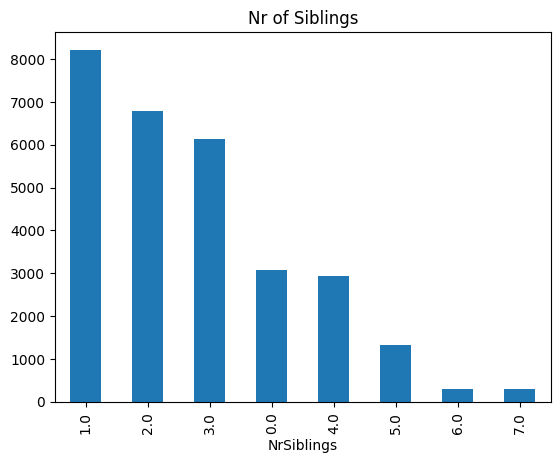

In [69]:
df['NrSiblings'].value_counts().plot(kind='bar')
plt.title('Nr of Siblings')
plt.show()

In [101]:
df.groupby(['NrSiblings']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

,MathScore,ReadingScore,WritingScore
NrSiblings,,,
0.000000,66.819449,69.547812,68.746515
1.000000,66.473896,69.259097,68.245345
2.000000,66.554934,69.472018,68.522533
3.000000,66.719092,69.488159,68.650498
4.000000,66.245495,69.144169,68.073444
5.000000,66.630303,69.453788,68.282576
6.000000,65.917219,68.801325,67.860927
7.000000,67.615120,69.828179,68.986254


##   Transportation vs Score

In [102]:
df.groupby(['TransportMeans']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
private,66.511354,69.472364,68.509593
school_bus,66.674636,69.446206,68.492351


In [103]:
df.groupby(['TransportMeans', 'TestPrep']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')


In [104]:
df.groupby(['TransportMeans', 'PracticeSport']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')


In [105]:
df.groupby(['TransportMeans', 'WklyStudyHours']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

## weekly study hr vs Score

In [106]:
df.groupby(['WklyStudyHours', 'TestPrep']).agg(all_mean_score_set()) \
    .style.background_gradient(cmap='RdPu')

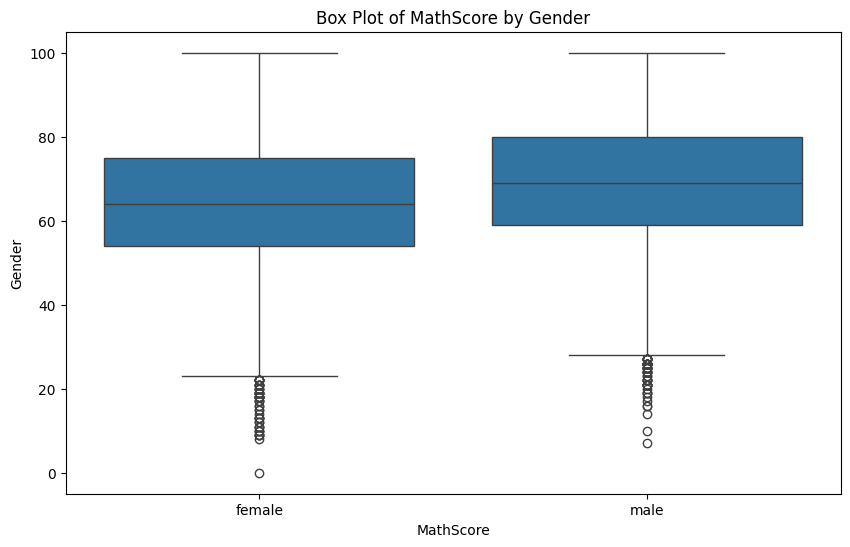

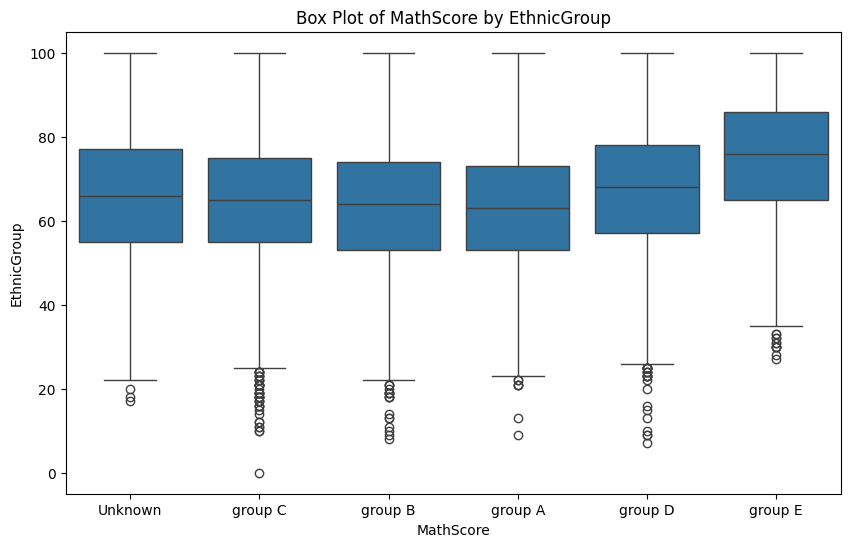

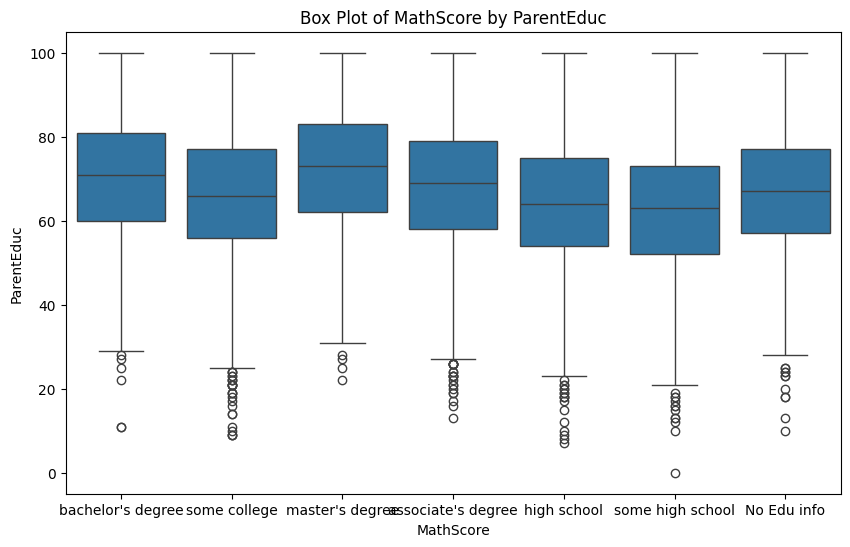

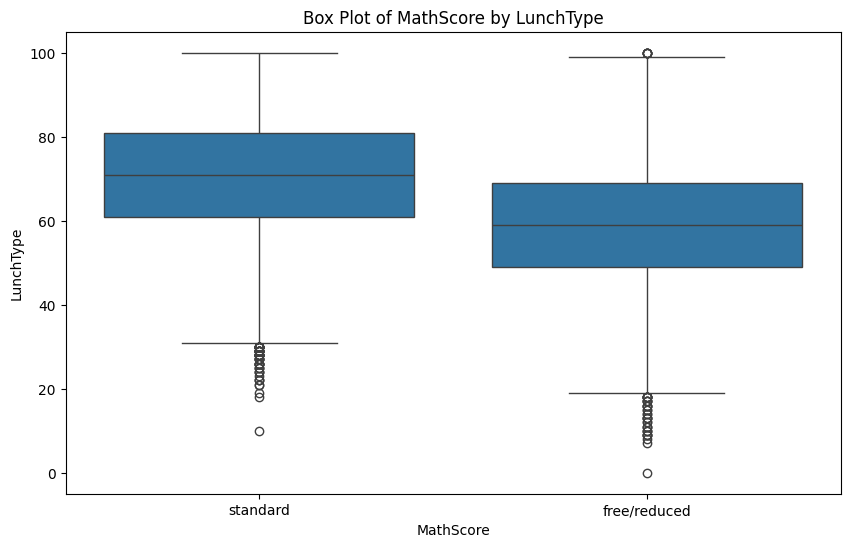

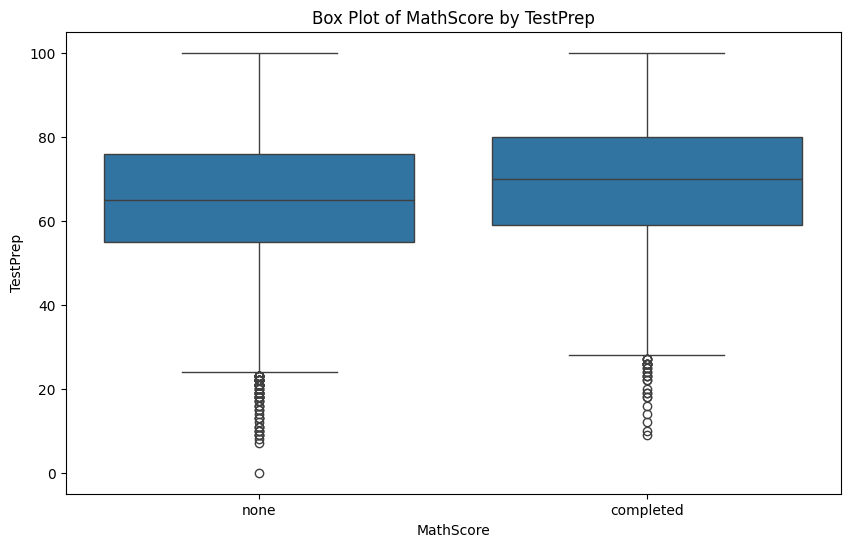

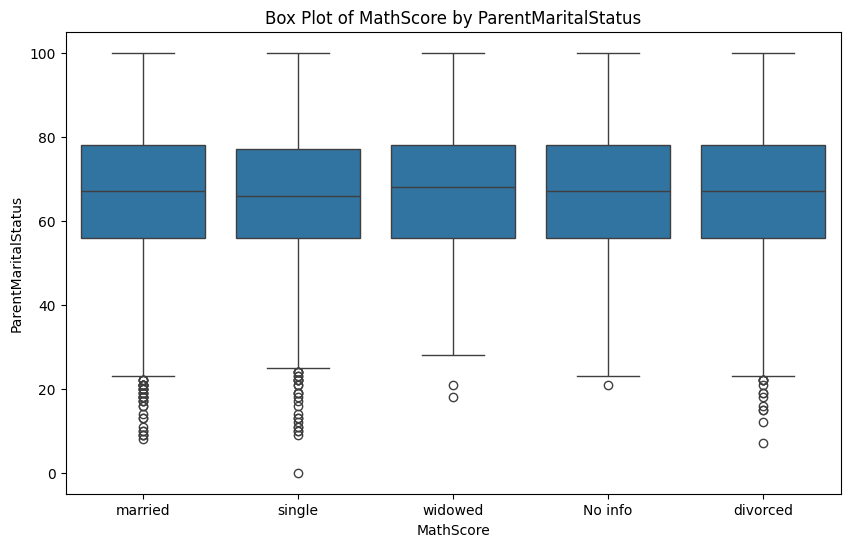

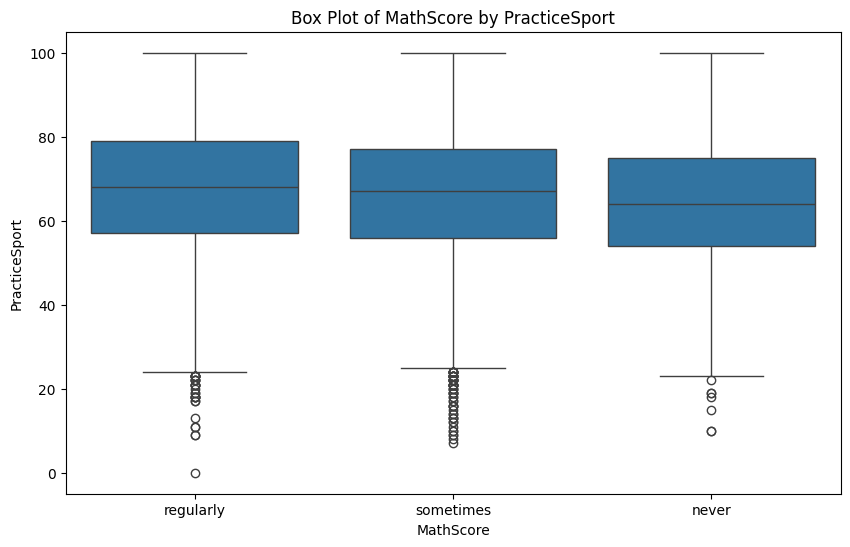

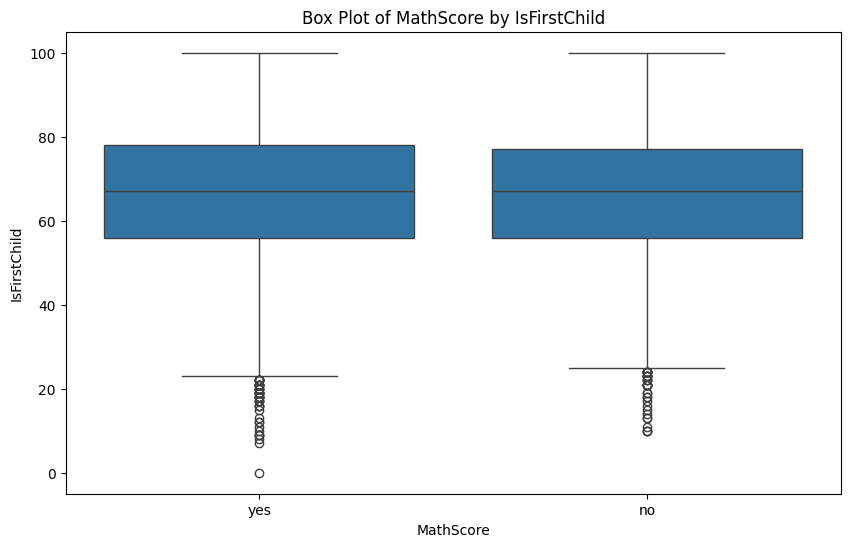

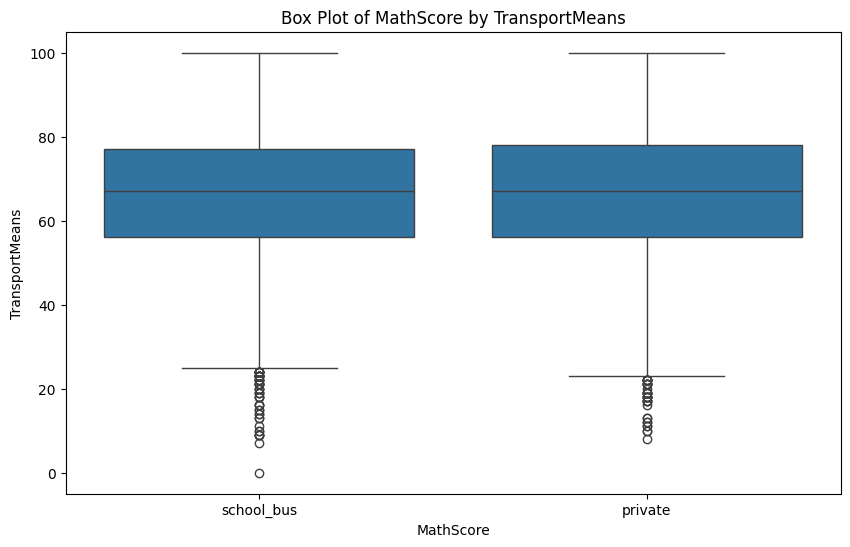

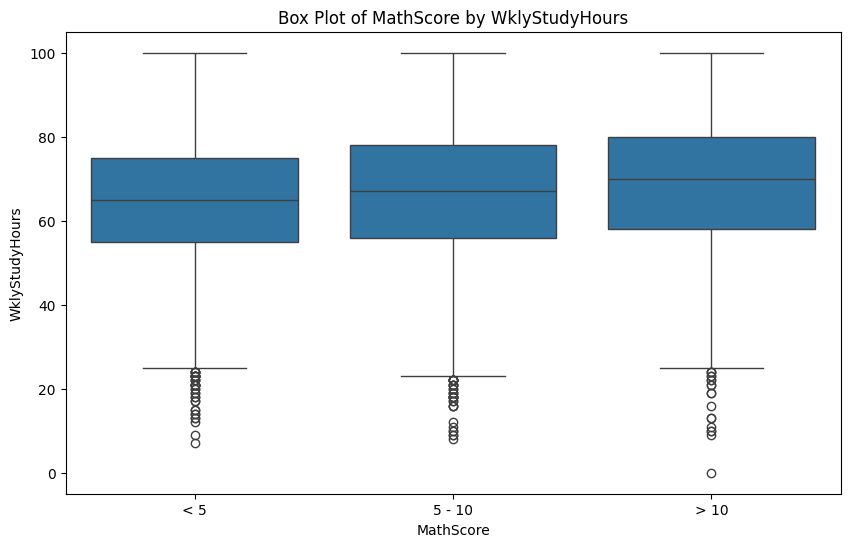

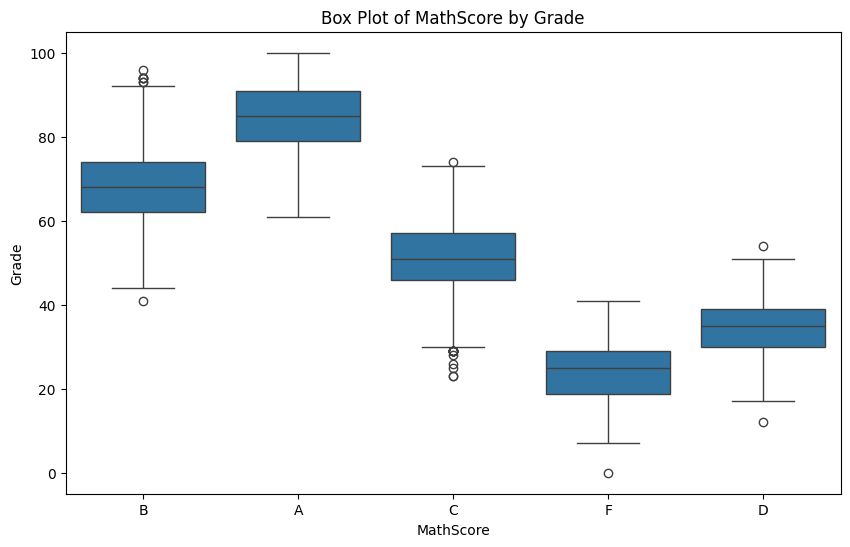

In [76]:
# Determine if there is linearity between the target variable and the categorical features. This indicates if linear regression is a good predictive model.
target = 'MathScore'

# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Create box plots
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=target, data=df)
    plt.title(f'Box Plot of {target} by {feature}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()